In [99]:
%cd /Users/pg/OneDrive/Duke Assigment/Job Seeking/Collection_DS_takehome_challenges/data/Fraud
#%cd C:\Users\szdxl\OneDrive\Duke Assigment\Job Seeking\Collection_DS_takehome_challenges\data\Fraud

/Users/pg/OneDrive/Duke Assigment/Job Seeking/Collection_DS_takehome_challenges/data/Fraud


In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
data=pd.read_csv('Fraud_Data.csv')
ip=pd.read_csv("IpAddress_to_Country.csv")

# Question One: Add Country to the Dataset

In [102]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [103]:
#check if there is any null in the dataset
data[data['class'].isnull()]
#no null data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class


In [104]:
ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [105]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
lower_bound_ip_address    138846 non-null float64
upper_bound_ip_address    138846 non-null int64
country                   138846 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [106]:
country=[]
for i in range(len(data)):
    ip_unit=data.loc[i, 'ip_address']
    test=ip[(ip['lower_bound_ip_address']<=ip_unit) & (ip['upper_bound_ip_address']>=ip_unit)]
    if len(test)==1:
        country.append(test['country'].values[0])
    else:
        country.append('NA')
        

In [107]:
data['country']=country

In [114]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,interval_seconds
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA,492085.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0


# OK all the countries are stored in the 'data' dataset now

# Question Two: Predicting Fraud

**目标：**

**让我们先来用简单的随机森林做一下**

**第二步用随机森林加入CV**

**第三步可以的话学习一下xgboost**

In [109]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
country           151112 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 13.8+ MB


In [111]:
data['purchase_time']=pd.to_datetime(data.purchase_time)
data['signup_time']=pd.to_datetime(data.signup_time)

In [112]:
timediff=data['purchase_time']-data['signup_time']

In [113]:
data['interval_seconds']=timediff.dt.total_seconds()

In [115]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,interval_seconds
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA,492085.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0


In [116]:
#let's think about how to deal with device_id and ip_address
#notice that the question mentions: we care about the first transaction of certain customer
#and so if certain ip_address or device_id appear more than once, it's very suspicious

In [117]:
#let's first check the device_id
device_num=data[['user_id', 'device_id']].groupby('device_id').count().reset_index()
device_num=device_num.rename(columns={'user_id': 'device_num'})
data=data.merge(device_num, how='left', on='device_id')

In [118]:
#let's first check the ip_address
device_num=data[['user_id', 'ip_address']].groupby('ip_address').count().reset_index()
device_num=device_num.rename(columns={'user_id': 'ip_num'})
data=data.merge(device_num, how='left', on='ip_address')

In [119]:
data.head()
#looks some variables are quite correlated but it's not a problem for randomforest

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,interval_seconds,device_num,ip_num
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA,492085.0,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0,1,1


In [120]:
data.drop(['user_id', 'signup_time', 'purchase_time', 'device_id'], axis=1, inplace=True)

In [122]:
data.head()

,purchase_value,source,browser,sex,age,ip_address,class,country,interval_seconds,device_num,ip_num
0,34,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0,1,1
1,16,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0,1,1
2,15,SEO,Opera,M,53,2.621474e+09,1,United States,1.0,12,12
3,44,SEO,Safari,M,41,3.840542e+09,0,NA,492085.0,1,1
4,39,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0,1,1


In [126]:
data2=data.copy()

In [127]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#X['dept']=le.fit_transform(data['dept'])

In [128]:
y=data['class']
X=data[data.columns[data.columns != 'class']]

In [129]:
X.head()

,purchase_value,source,browser,sex,age,ip_address,country,interval_seconds,device_num,ip_num
0,34,SEO,Chrome,M,39,7.327584e+08,Japan,4506682.0,1,1
1,16,Ads,Chrome,F,53,3.503114e+08,United States,17944.0,1,1
2,15,SEO,Opera,M,53,2.621474e+09,United States,1.0,12,12
3,44,SEO,Safari,M,41,3.840542e+09,NA,492085.0,1,1
4,39,Ads,Safari,M,45,4.155831e+08,United States,4361461.0,1,1


In [130]:
X['source']=le.fit_transform(X['source'])
X['browser']=le.fit_transform(X['browser'])
X['sex']=le.fit_transform(X['sex'])
X['country']=le.fit_transform(X['country'])

/Users/pg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/pg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/pg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [131]:
X.head()

,purchase_value,source,browser,sex,age,ip_address,country,interval_seconds,device_num,ip_num
0,34,2,0,1,39,7.327584e+08,84,4506682.0,1,1
1,16,0,0,0,53,3.503114e+08,172,17944.0,1,1
2,15,2,3,1,53,2.621474e+09,172,1.0,12,12
3,44,2,4,1,41,3.840542e+09,115,492085.0,1,1
4,39,0,4,1,45,4.155831e+08,172,4361461.0,1,1


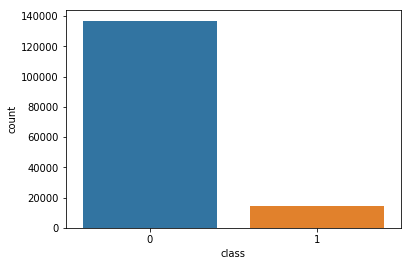

In [133]:
sns.countplot(y)
#it's an unbalanced sample. Pay attention

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [137]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
modelRF=RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt', random_state=42)
modelRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [142]:
predictionRF=modelRF.predict(X_test)

In [144]:
print(classification_report(y_test, predictionRF))
#looks like a very high accuracy, but it's an unbalance sample. So let's look at the ROC curve

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27373
           1       0.99      0.54      0.70      2850

   micro avg       0.96      0.96      0.96     30223
   macro avg       0.97      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223



In [145]:
modelRF_AUC=roc_auc_score(y_test, predictionRF)

In [147]:
fpr, tpr, thresholds=roc_curve(y_test, modelRF.predict_proba(X_test)[:, 1])

In [148]:
ROC=pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds':thresholds})

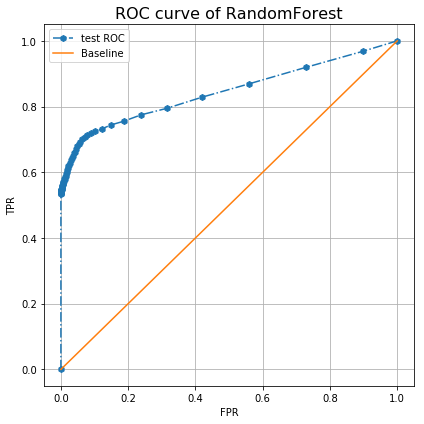

In [169]:
fig, ax=plt.subplots(figsize=(6, 6))
ax.grid(True)
ax.plot(fpr, tpr, label='test ROC', marker='h', linestyle='-.')
plt.plot([0,1], [0,1], label='Baseline')
ax.set_title('ROC curve of RandomForest', fontsize=16)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
plt.legend()
plt.tight_layout()
plt.show()

In [173]:
ROC[(ROC['fpr']<0.1) & (ROC['tpr']>0.6)]

,fpr,tpr,thresholds
35,0.016951,0.600702,0.29
36,0.018887,0.606667,0.28
37,0.020860,0.611579,0.27
38,0.022394,0.617895,0.26
39,0.024659,0.622456,0.25
40,0.027217,0.628772,0.24
41,0.029518,0.637544,0.23
42,0.032002,0.643860,0.22
43,0.034596,0.650877,0.21
44,0.038067,0.657193,0.20


**The threshold choose is tricky. It depends on the cost of wrong choice,**

**In my opinion, the false negative (predicted as 0 but is actually 1) is more serious because if we identify someone who is actually fraud as not fraud, it will cause direct money lose for the company**

**FNR=1-TPR so we want to have a higher TRP, so we may want a smaller threshold**

**However, a high TPR also means a high FPR, and we still can lose money if we identify someone who is actually not fraud as fraud**

**So we should minimize the E[p(FN)*loss(FN)+p(FP)*loss(FP)]**

# Next Question

In [175]:
modelRF.feature_importances_

array([0.07433911, 0.0112564 , 0.02163931, 0.00913876, 0.06291426,
       0.11926301, 0.0380274 , 0.38703632, 0.1271226 , 0.14926283])

In [176]:
X_train.columns

Index(['purchase_value', 'source', 'browser', 'sex', 'age', 'ip_address',
       'country', 'interval_seconds', 'device_num', 'ip_num'],
      dtype='object')

In [182]:
feature_important=pd.DataFrame({'feature':X_train.columns, 'score':modelRF.feature_importances_})
feature_important.sort_values(by='score', inplace=True, ascending=False)

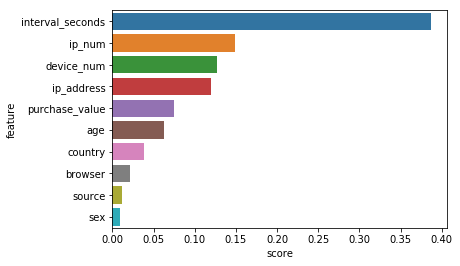

In [212]:
sns.barplot(x='score', y='feature', data=feature_important)

**let's try cross validation**

In [192]:
from sklearn.model_selection import cross_val_predict

In [185]:
model=RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt', random_state=42)
predict_CV=cross_val_predict(model, X, y, cv=10)

In [187]:
print(classification_report(y, predict_CV))
#looks like a very high accuracy, but it's an unbalance sample. So let's look at the ROC curve
#The result is not significantly better

              precision    recall  f1-score   support

           0       0.95      1.00      0.98    136961
           1       0.98      0.54      0.70     14151

   micro avg       0.96      0.96      0.96    151112
   macro avg       0.97      0.77      0.84    151112
weighted avg       0.96      0.96      0.95    151112



In [189]:
#fpr_cv, tpr_cv, thresholds_cv=roc_curve(y, cross_val_predict(model, X, y, cv=10))

In [ ]:
fpr_cv, tpr_cv, thresholds_cv=roc_curve(y, cross_val_pr(model, X, y, cv=10))

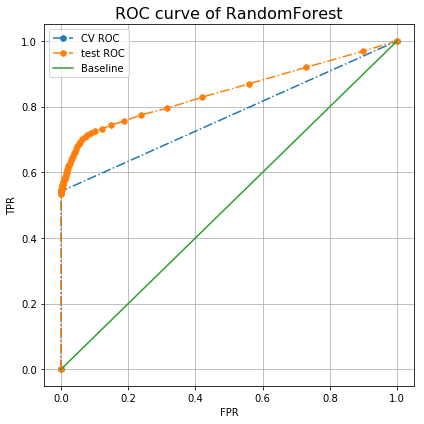

In [193]:
fig, ax=plt.subplots(figsize=(6, 6))
ax.grid(True)
ax.plot(fpr_cv, tpr_cv, label='CV ROC', marker='h', linestyle='-.')
ax.plot(fpr, tpr, label='test ROC', marker='h', linestyle='-.')
plt.plot([0,1], [0,1], label='Baseline')
ax.set_title('ROC curve of RandomForest', fontsize=16)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
plt.legend()
plt.tight_layout()
plt.show()

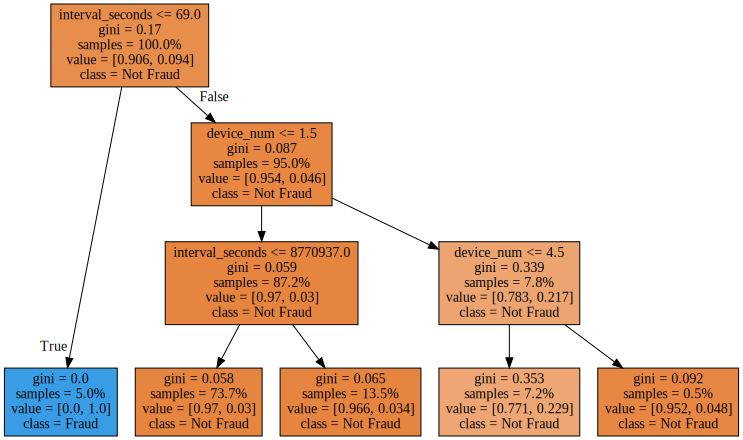

In [203]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
DT=DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, min_samples_split=20)
DT.fit(X, y)
dot_data=export_graphviz(DT, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'], proportion=True, leaves_parallel=True, filled=True)
pic=graphviz.Source(dot_data)
pic

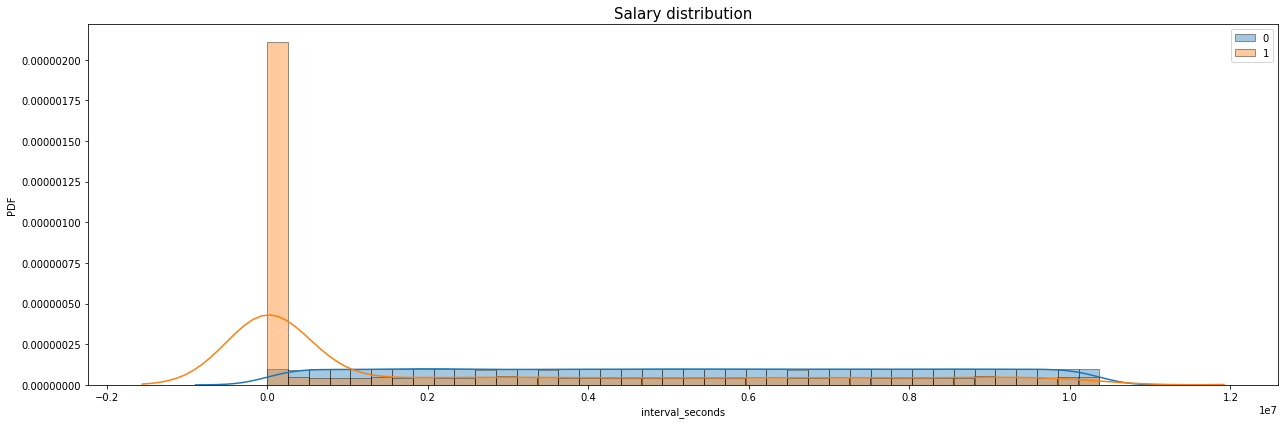

In [210]:
#let's take a closer look at what's happening in interval_seconds
hist_kws={'histtype': 'bar', 'edgecolor': 'black', 'alpha': 0.4}
fig, ax=plt.subplots(figsize=(18, 6))
sns.distplot(data[data['class']==0]['interval_seconds'], label='0', hist_kws=hist_kws, bins=40)
sns.distplot(data[data['class']==1]['interval_seconds'], label='1', hist_kws=hist_kws, bins=40)
ax.set_title('Salary distribution', fontsize=15)
ax.set_ylabel('PDF')
plt.legend()
plt.tight_layout()
plt.show()

# Conclusion and Answer Questions

For each user, determine her country based on the numeric IP address.

Build a model to predict whether an activity is fraudulent or not. Explain how different assumptions about the cost of false positives vs false negatives would impact the model.

Your boss is a bit worried about using a model she doesn't understand for something as important as fraud detection. How would you explain her how the model is making the predictions? Not from a mathematical perspective (she couldn't care less about that), but from a user perspective. What kinds of users are more likely to be classified as at risk? 
What are their characteristics?

Let's say you now have this model which can be used live to predict in real time if an activity is fraudulent or not. From a product perspective, how would you use it? That is,

**Question One:**

*It's added into the data table.*

**Question Two:**

*A RandomForest Model is built to make prediction and the result is all right. The threshold choose is tricky. It depends on the cost of wrong choice,*

*In my opinion, the false negative (predicted as 0 but is actually 1) is more serious because if we identify someone who is actually fraud as not fraud, it will cause direct money lose for the company*

*FNR=1-TPR so we want to have a higher TRP, so we may want a smaller threshold*

*However, a high TPR also means a high FPR, and we still can lose money if we identify someone who is actually not fraud as fraud*

*So we should minimize the E[p(FN)*loss(FN)+p(FP)*loss(FP)]*

**Question Three:**

*A decision tree is very suitable to be used to explain important features. Obviously the inter_val_after_signup is a good signal to measure customer's fraud probability. The shorter the interval, the more likely it's a fraud. if the interval is close to 0, it's very possible*

*Another signal is number of device shared. The positive rate is 23%, so if we see a device is shared by multiple transactions, it's worth attention.*

**Question Four**

*Set two posibility p1 and p2 (p1<p2)*

*If predicted p<p1, consider this as OK. If p1<p<p2, consider this as suspicious and take a closer look at that and require more information from the customer. If p>p2, consider this as a fraud and maybe manually check the customer.*



# Takeaways From the Project

**Learned how to use CV**

**Think more carefully about how to choose threshold by think about the expected loss/revenue**

**Learn how to use intepret the model to someone do not know math. Decision Tree Here is a good Choice**